In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score, average_precision_score
from sklearn.metrics import f1_score

In [2]:
bin_clf_base = './'
df = pd.read_csv(bin_clf_base + "adult.csv")

In [4]:
for col in df.columns:
    mode = df[col].mode()[0]
    df[col] = df[col].apply(lambda x: mode if x == '?' else x)

In [6]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [7]:
# Числовые признаки
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Категориальные признаки
cat_features = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']

In [8]:
for cat_feature in cat_features:
    one_hot = pd.get_dummies(df[cat_feature], drop_first=True, prefix=cat_feature)
    df = df.drop(cat_feature, axis=1)
    df = df.join(one_hot)

In [9]:
y_col = 'income'
y = df[y_col]
X = df.loc[:, df.columns != y_col]
X = np.array(X.values)
y = np.array(y.values)
validation_size = 0.20
seed = 17

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
    test_size=validation_size, random_state=seed)

In [10]:
Y_validation.shape

(6513,)

In [12]:
from sklearn.model_selection import cross_val_score
models = {'DummyClassifier': DummyClassifier(strategy="most_frequent"),
'LogisticRegression': LogisticRegression(),
'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
'KNeighborsClassifier' : KNeighborsClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'GaussianNB': GaussianNB(),
'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_features=3),
'MLPClassifier': MLPClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100),
'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, max_features=3),
'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=100),
'XGBClassifier': XGBClassifier(n_estimators=100, verbosity=0, use_label_encoder=False),
'CatBoostClassifier': CatBoostClassifier(iterations=100, silent=True),
}
cv = KFold(n_splits=10, random_state=None, shuffle=False)

def cross_v(model, *args, **kwargs):
    print(model)
    return cross_validate(*args, **kwargs)

results_cr_val = {model: cross_v(model, models[model], X_train, Y_train, cv = cv) for model in models}

DummyClassifier
LogisticRegression


c:\Users\Tikhon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearDiscriminantAnalysis
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB
RandomForestClassifier
MLPClassifier
AdaBoostClassifier
GradientBoostingClassifier
ExtraTreesClassifier
XGBClassifier
CatBoostClassifier


In [13]:
import pickle, sys

results_size = {model: sys.getsizeof(pickle.dumps(models[model])) for model in models}

In [14]:
results_df = pd.DataFrame(results_cr_val)

In [20]:
results_df

,DummyClassifier,LogisticRegression,LinearDiscriminantAnalysis,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,MLPClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,XGBClassifier,CatBoostClassifier
fit_time,"[0.00821828842163086, 0.01600170135498047, 0.0...","[0.5154590606689453, 0.7009537220001221, 0.466...","[0.5995850563049316, 0.5864439010620117, 0.616...","[0.07515597343444824, 0.08429956436157227, 0.0...","[0.43393898010253906, 0.4489586353302002, 0.43...","[0.12343692779541016, 0.11530542373657227, 0.1...","[4.047330141067505, 3.9799087047576904, 3.9965...","[5.313454866409302, 4.109072685241699, 10.1918...","[18.284533739089966, 18.35003900527954, 18.319...","[0.8825240135192871, 0.965674638748169, 0.9324...","[5.745679616928101, 5.645719289779663, 5.59593...","[0.4530909061431885, 0.5937504768371582, 0.656...","[1.8437533378601074, 1.5249354839324951, 1.631..."
score_time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007958412170410156...","[0.016384601593017578, 0.01718878746032715, 0....","[0.0, 0.0, 0.0, 0.01640462875366211, 0.0118567...","[0.7647807598114014, 0.3492755889892578, 0.380...","[0.021556377410888672, 0.015591621398925781, 0...","[0.014467239379882812, 0.016680240631103516, 0...","[0.06632518768310547, 0.0668027400970459, 0.08...","[0.016900062561035156, 0.005239009857177734, 0...","[0.8328752517700195, 0.8169224262237549, 0.815...","[0.016968965530395508, 0.016599655151367188, 0...","[0.08345174789428711, 0.08334231376647949, 0.0...","[0.04575490951538086, 0.046872854232788086, 0....","[0.07811880111694336, 0.05951666831970215, 0.0..."
test_score,"[0.7712092130518234, 0.7719769673704414, 0.753...","[0.8015355086372361, 0.8134357005758157, 0.797...","[0.8468330134357006, 0.8483685220729367, 0.836...","[0.7758157389635316, 0.7781190019193858, 0.774...","[0.818809980806142, 0.8119001919385797, 0.8184...","[0.7915547024952015, 0.8115163147792707, 0.792...","[0.8495201535508637, 0.8629558541266794, 0.843...","[0.8072936660268714, 0.7961612284069098, 0.270...","[0.8629558541266794, 0.8710172744721689, 0.863...","[0.85489443378119, 0.8610364683301344, 0.85220...","[0.8391554702495202, 0.8464491362763915, 0.834...","[0.8710172744721689, 0.8767754318618042, 0.869...","[0.8694817658349329, 0.8737044145873321, 0.872..."


In [18]:
results_df.loc['fit_time']

DummyClassifier               [0.00821828842163086, 0.01600170135498047, 0.0...
LogisticRegression            [0.5154590606689453, 0.7009537220001221, 0.466...
LinearDiscriminantAnalysis    [0.5995850563049316, 0.5864439010620117, 0.616...
KNeighborsClassifier          [0.07515597343444824, 0.08429956436157227, 0.0...
DecisionTreeClassifier        [0.43393898010253906, 0.4489586353302002, 0.43...
GaussianNB                    [0.12343692779541016, 0.11530542373657227, 0.1...
RandomForestClassifier        [4.047330141067505, 3.9799087047576904, 3.9965...
MLPClassifier                 [5.313454866409302, 4.109072685241699, 10.1918...
AdaBoostClassifier            [18.284533739089966, 18.35003900527954, 18.319...
GradientBoostingClassifier    [0.8825240135192871, 0.965674638748169, 0.9324...
ExtraTreesClassifier          [5.745679616928101, 5.645719289779663, 5.59593...
XGBClassifier                 [0.4530909061431885, 0.5937504768371582, 0.656...
CatBoostClassifier            [1.8437533

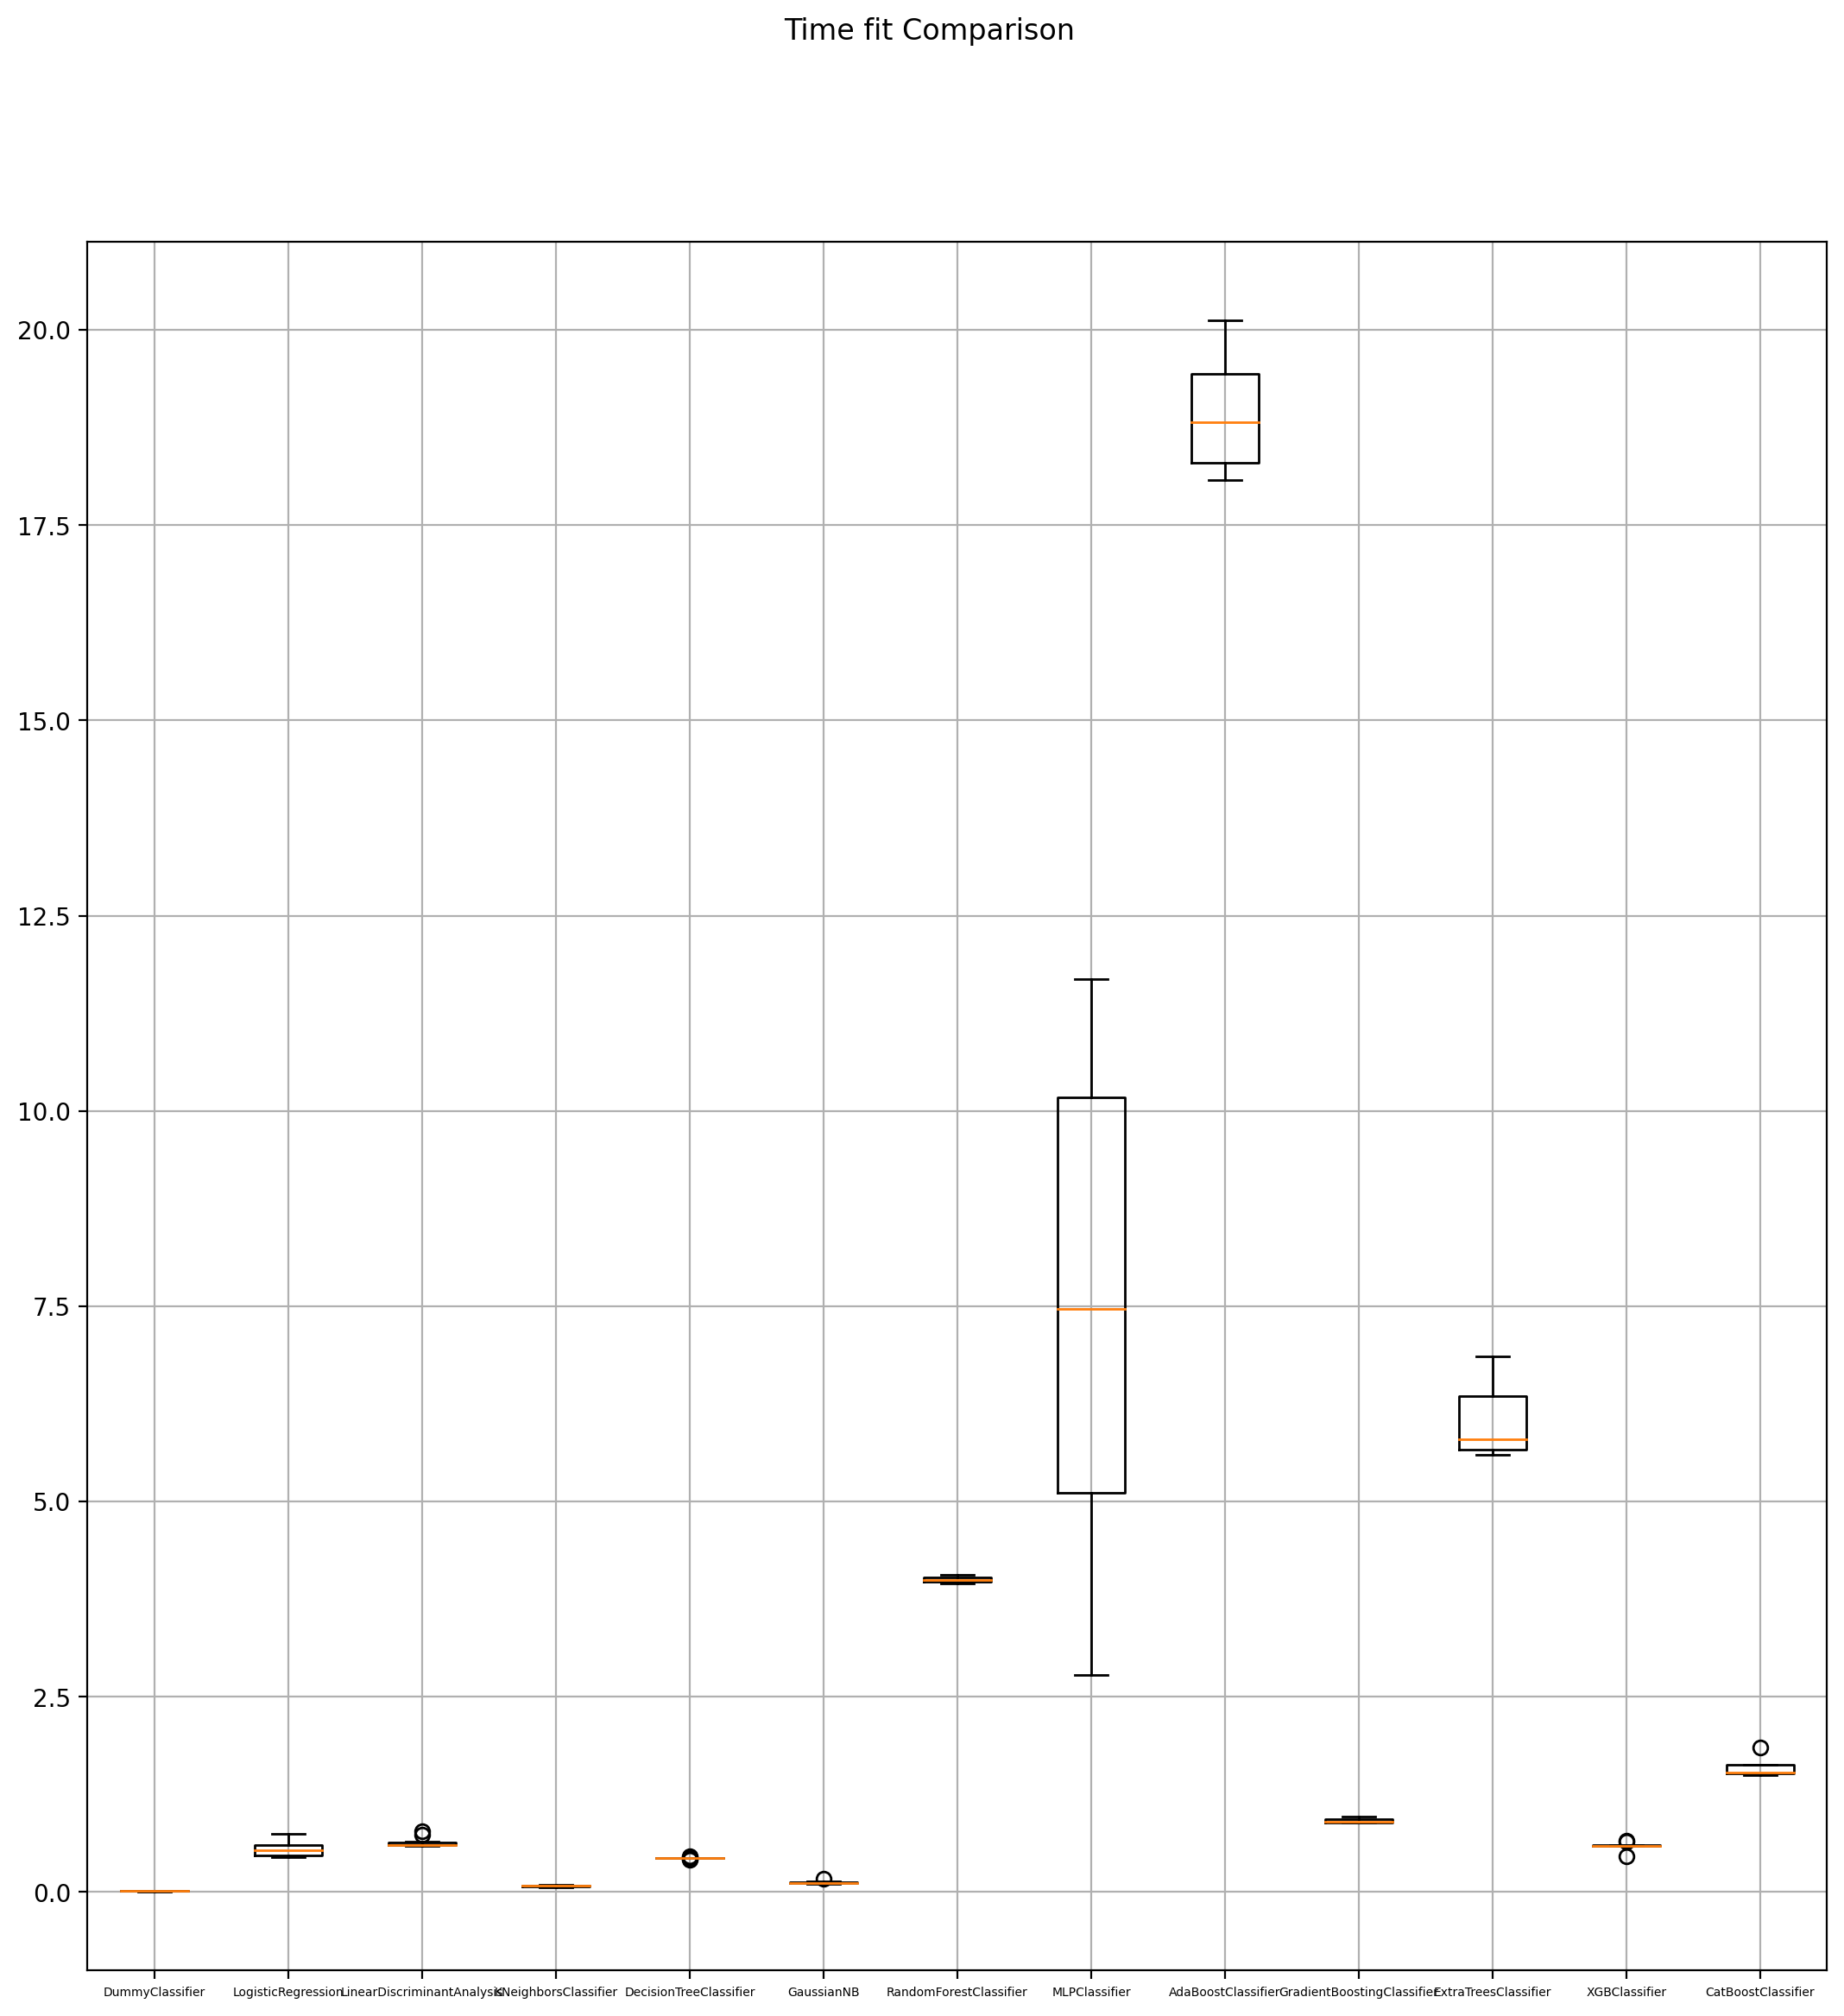

In [23]:
names = list(models)
fig = plt.figure(figsize=(13, 13), dpi=200)
fig.suptitle('Time fit Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_df.loc['fit_time'])
ax.set_xticklabels(names, fontsize=5)
plt.grid()

plt.show();

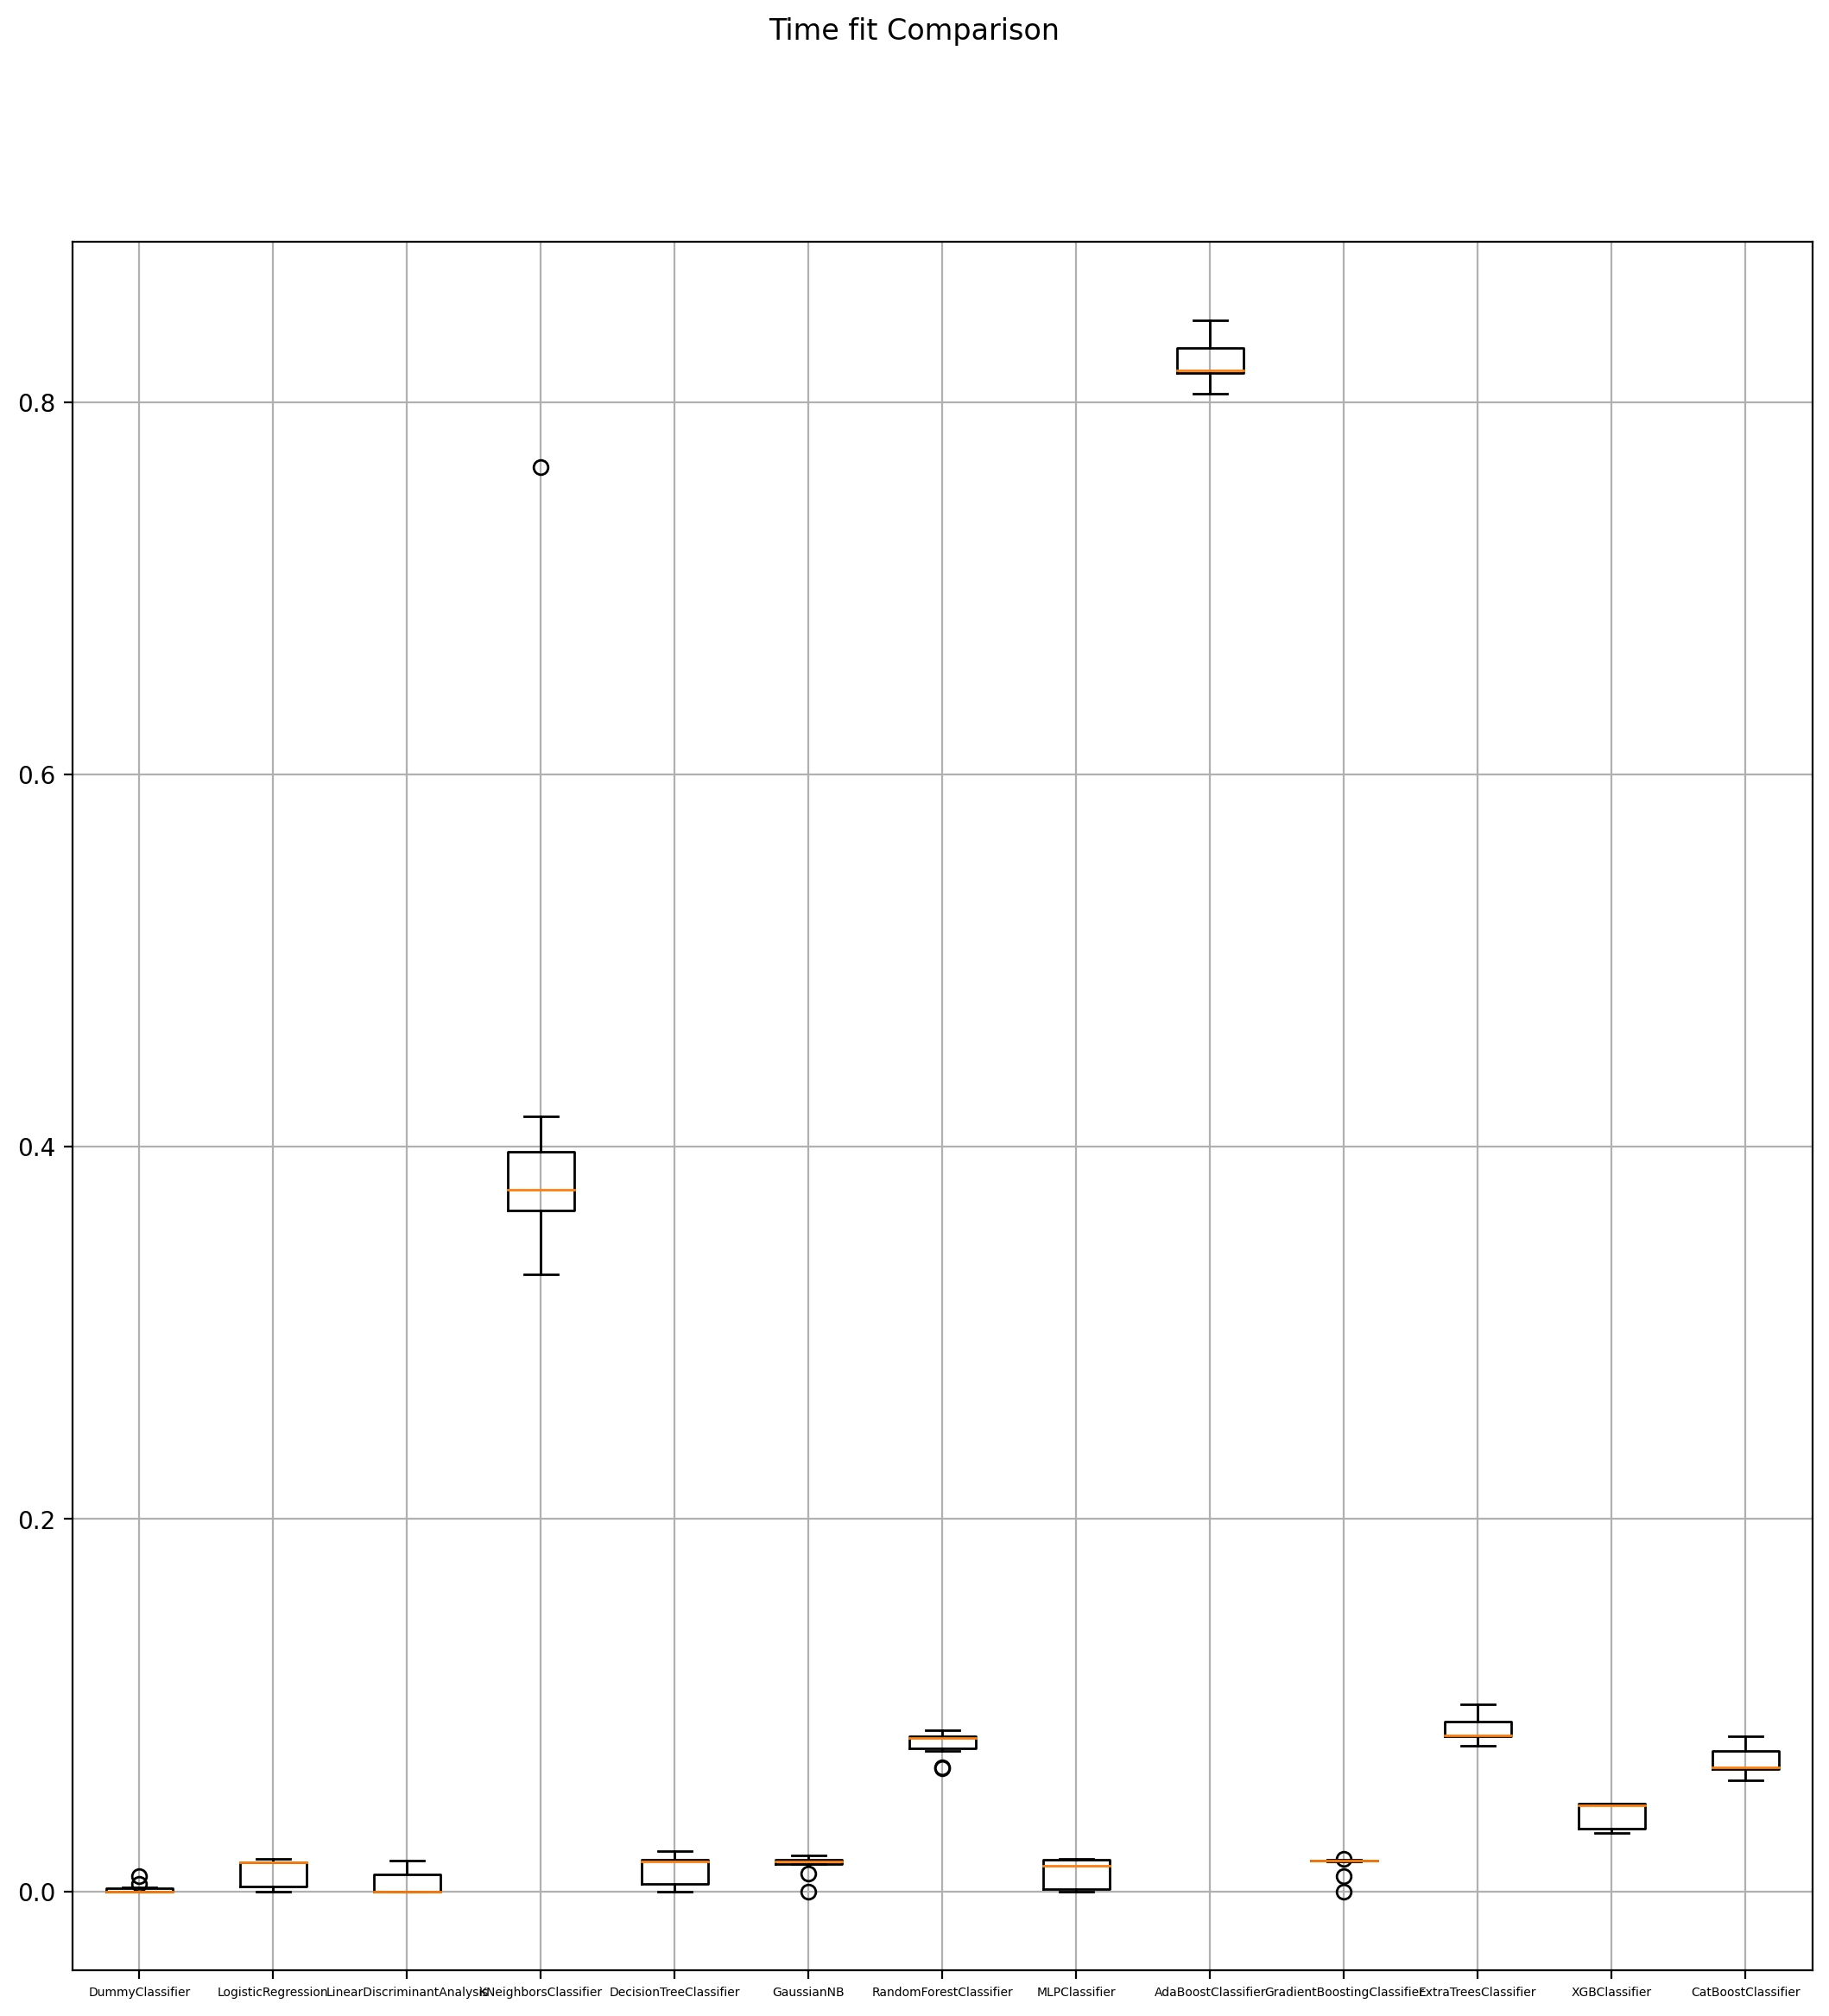

In [24]:
names = list(models)
fig = plt.figure(figsize=(13, 13), dpi=200)
fig.suptitle('Time fit Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_df.loc['score_time'])
ax.set_xticklabels(names, fontsize=5)
plt.grid()

plt.show();

In [25]:
cat_boost = CatBoostClassifier(iterations=100, silent=True)
cat_boost.fit(X_train, Y_train)
predictions = cat_boost.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print("Precision: %s%%" % (100*precision_score(Y_validation, predictions)))
print("Recall: %s%%" % (100*recall_score(Y_validation, predictions)))
print("F1: %s%%" % (100*f1_score(Y_validation, predictions)))
print("Balanced accuracy: %s%%" % (100*balanced_accuracy_score(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Accuracy: 87.57868877629356%
Precision: 77.63457164518574%
Recall: 66.57997399219767%
F1: 71.68358417920896%
Balanced accuracy: 80.32516287549582%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4975
           1       0.78      0.67      0.72      1538

    accuracy                           0.88      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513



In [26]:
pd.crosstab(predictions, Y_validation, rownames = ['Predicted'], colnames =['Actual'])

Actual,0,1
Predicted,,
0,4680,514
1,295,1024


In [29]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
res = [cross_val_score(CatBoostClassifier(iterations=n_trees), X_train, Y_train, cv = cv, scoring='f1') for n_trees in range(10, 110, 10)]
print(res)

Learning rate set to 0.5
0:	learn: 0.3870743	total: 17.2ms	remaining: 155ms
1:	learn: 0.3359319	total: 33.4ms	remaining: 133ms
2:	learn: 0.3188880	total: 49.7ms	remaining: 116ms
3:	learn: 0.3141321	total: 67.5ms	remaining: 101ms
4:	learn: 0.3085707	total: 82.7ms	remaining: 82.7ms
5:	learn: 0.3047132	total: 99.9ms	remaining: 66.6ms
6:	learn: 0.3002525	total: 115ms	remaining: 49.5ms
7:	learn: 0.2974072	total: 132ms	remaining: 33ms
8:	learn: 0.2947482	total: 148ms	remaining: 16.5ms
9:	learn: 0.2923420	total: 164ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3873937	total: 19.7ms	remaining: 177ms
1:	learn: 0.3395317	total: 36.6ms	remaining: 147ms
2:	learn: 0.3204620	total: 53.4ms	remaining: 125ms
3:	learn: 0.3163693	total: 71.7ms	remaining: 108ms
4:	learn: 0.3105597	total: 92.4ms	remaining: 92.4ms
5:	learn: 0.3064669	total: 116ms	remaining: 77.6ms
6:	learn: 0.3027503	total: 138ms	remaining: 59.3ms
7:	learn: 0.2978027	total: 158ms	remaining: 39.4ms
8:	learn: 0.2950895	total: 179ms	r

In [30]:
res_ = [r.mean() for r in res]

In [31]:
res_

[0.6706842749928796,
 0.693910489445712,
 0.7003944527820065,
 0.7029382148463204,
 0.7057806775150978,
 0.708923212209443,
 0.7075607625450296,
 0.7081816510015309,
 0.7043719752097171,
 0.7082513404960562]

F-мера:

$$F_1 = 2\frac{Recall \cdot Precision}{Recall + Precision}$$

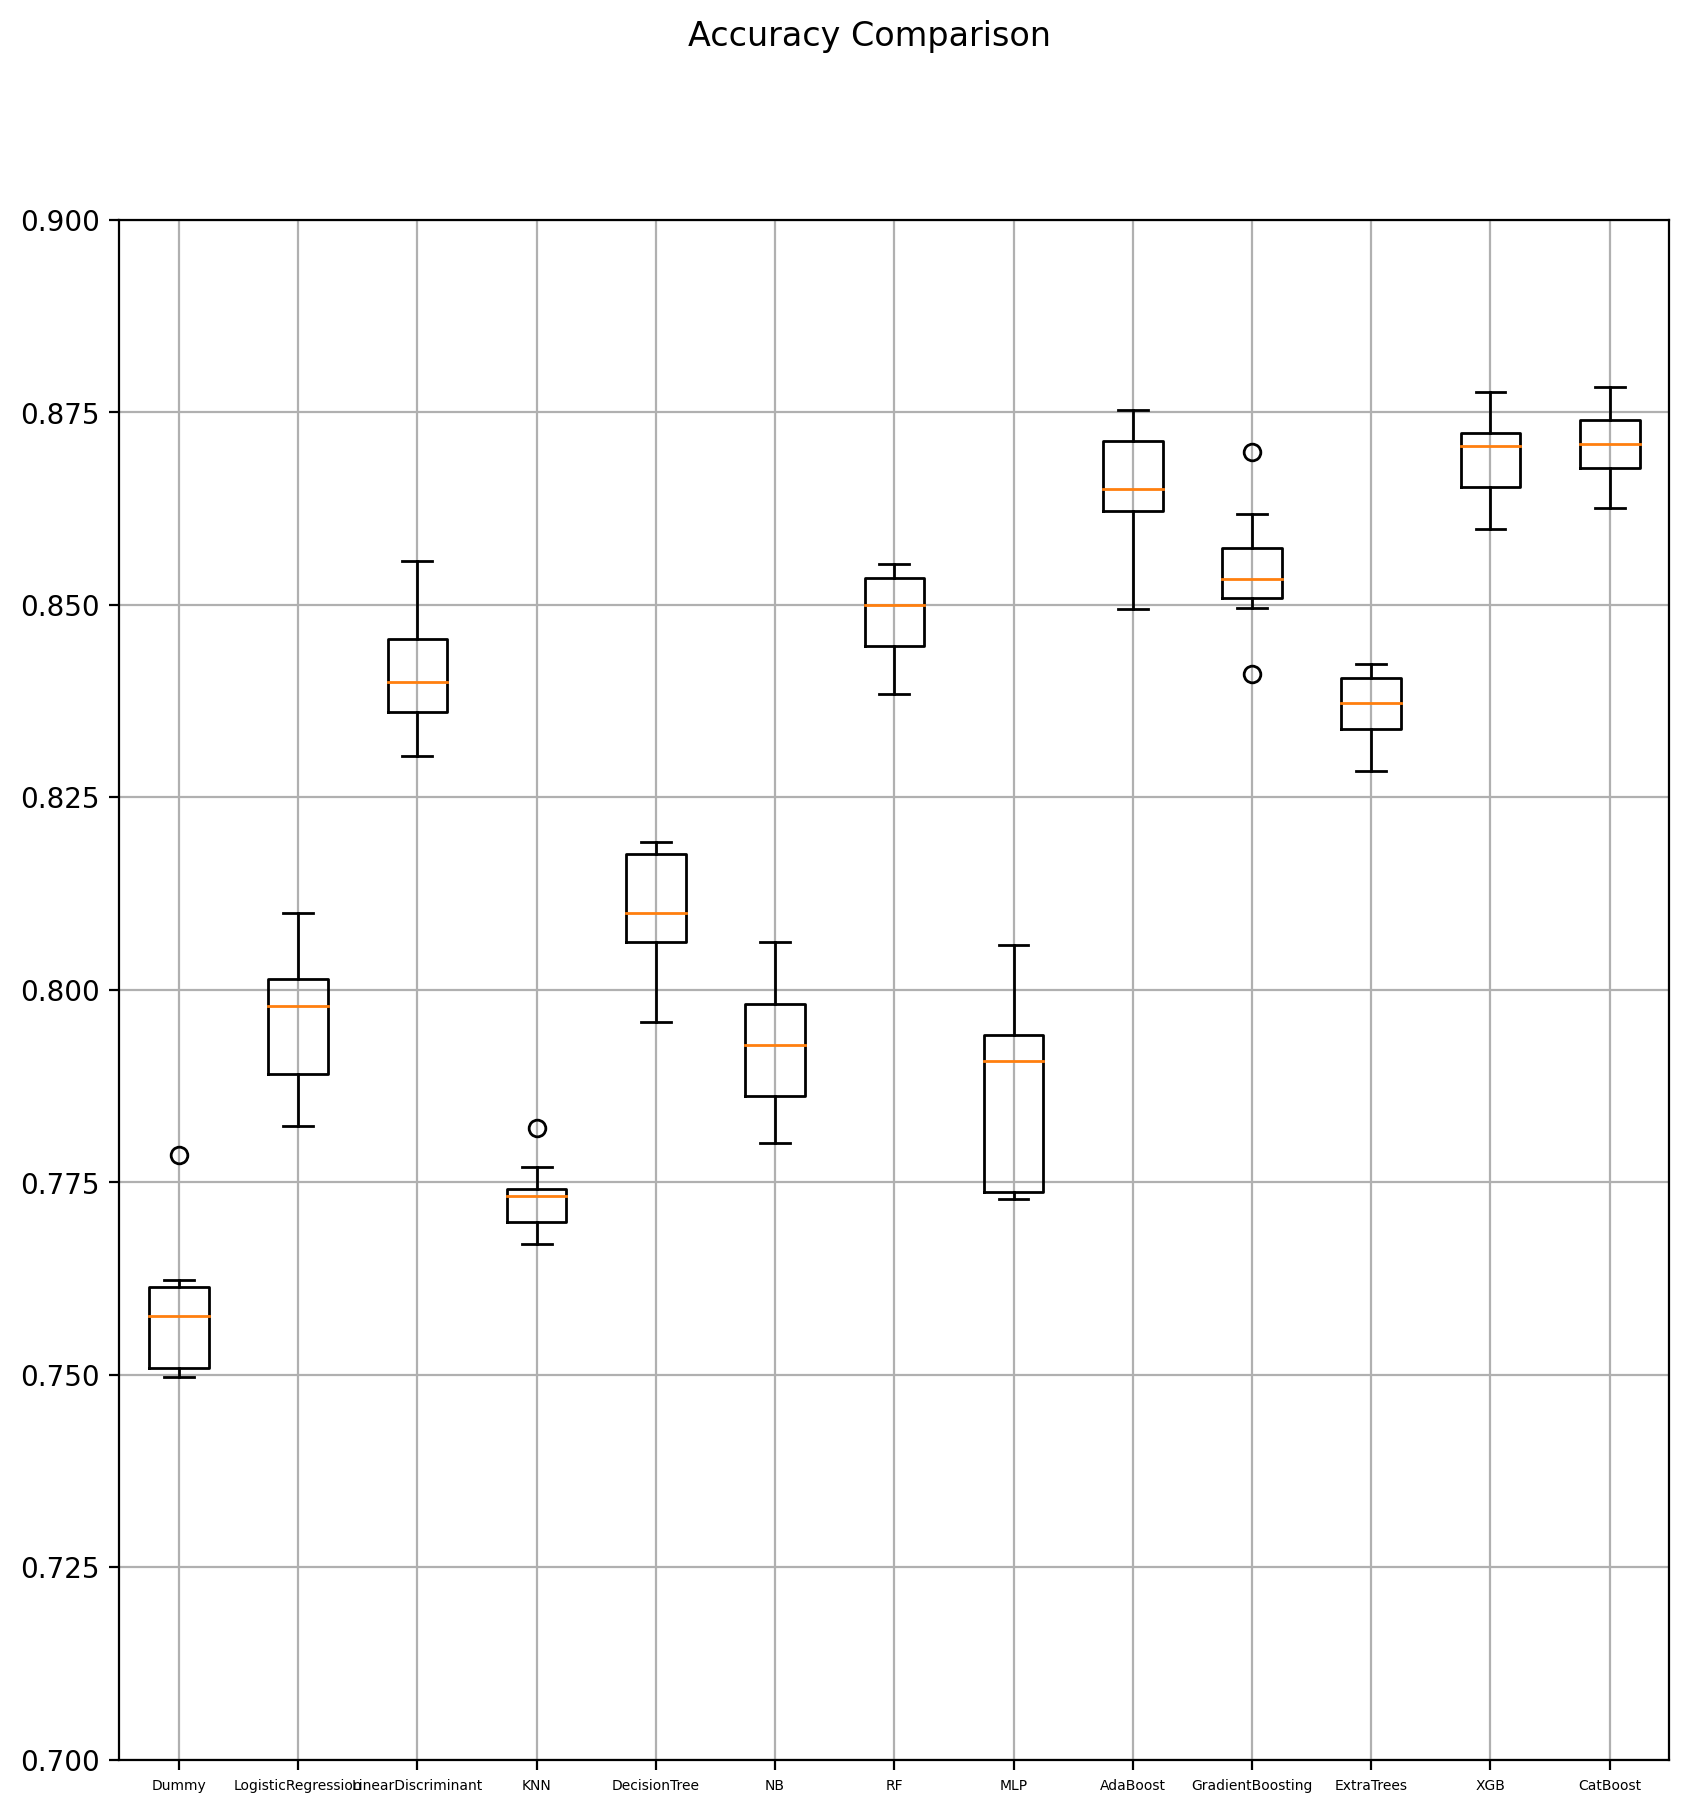

In [21]:
fig = plt.figure(figsize=(10, 10), dpi=200)
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_df.test_accuracy)
ax.set_xticklabels(names, fontsize=5)
plt.ylim((0.7, 0.9))
plt.grid()
plt.show();

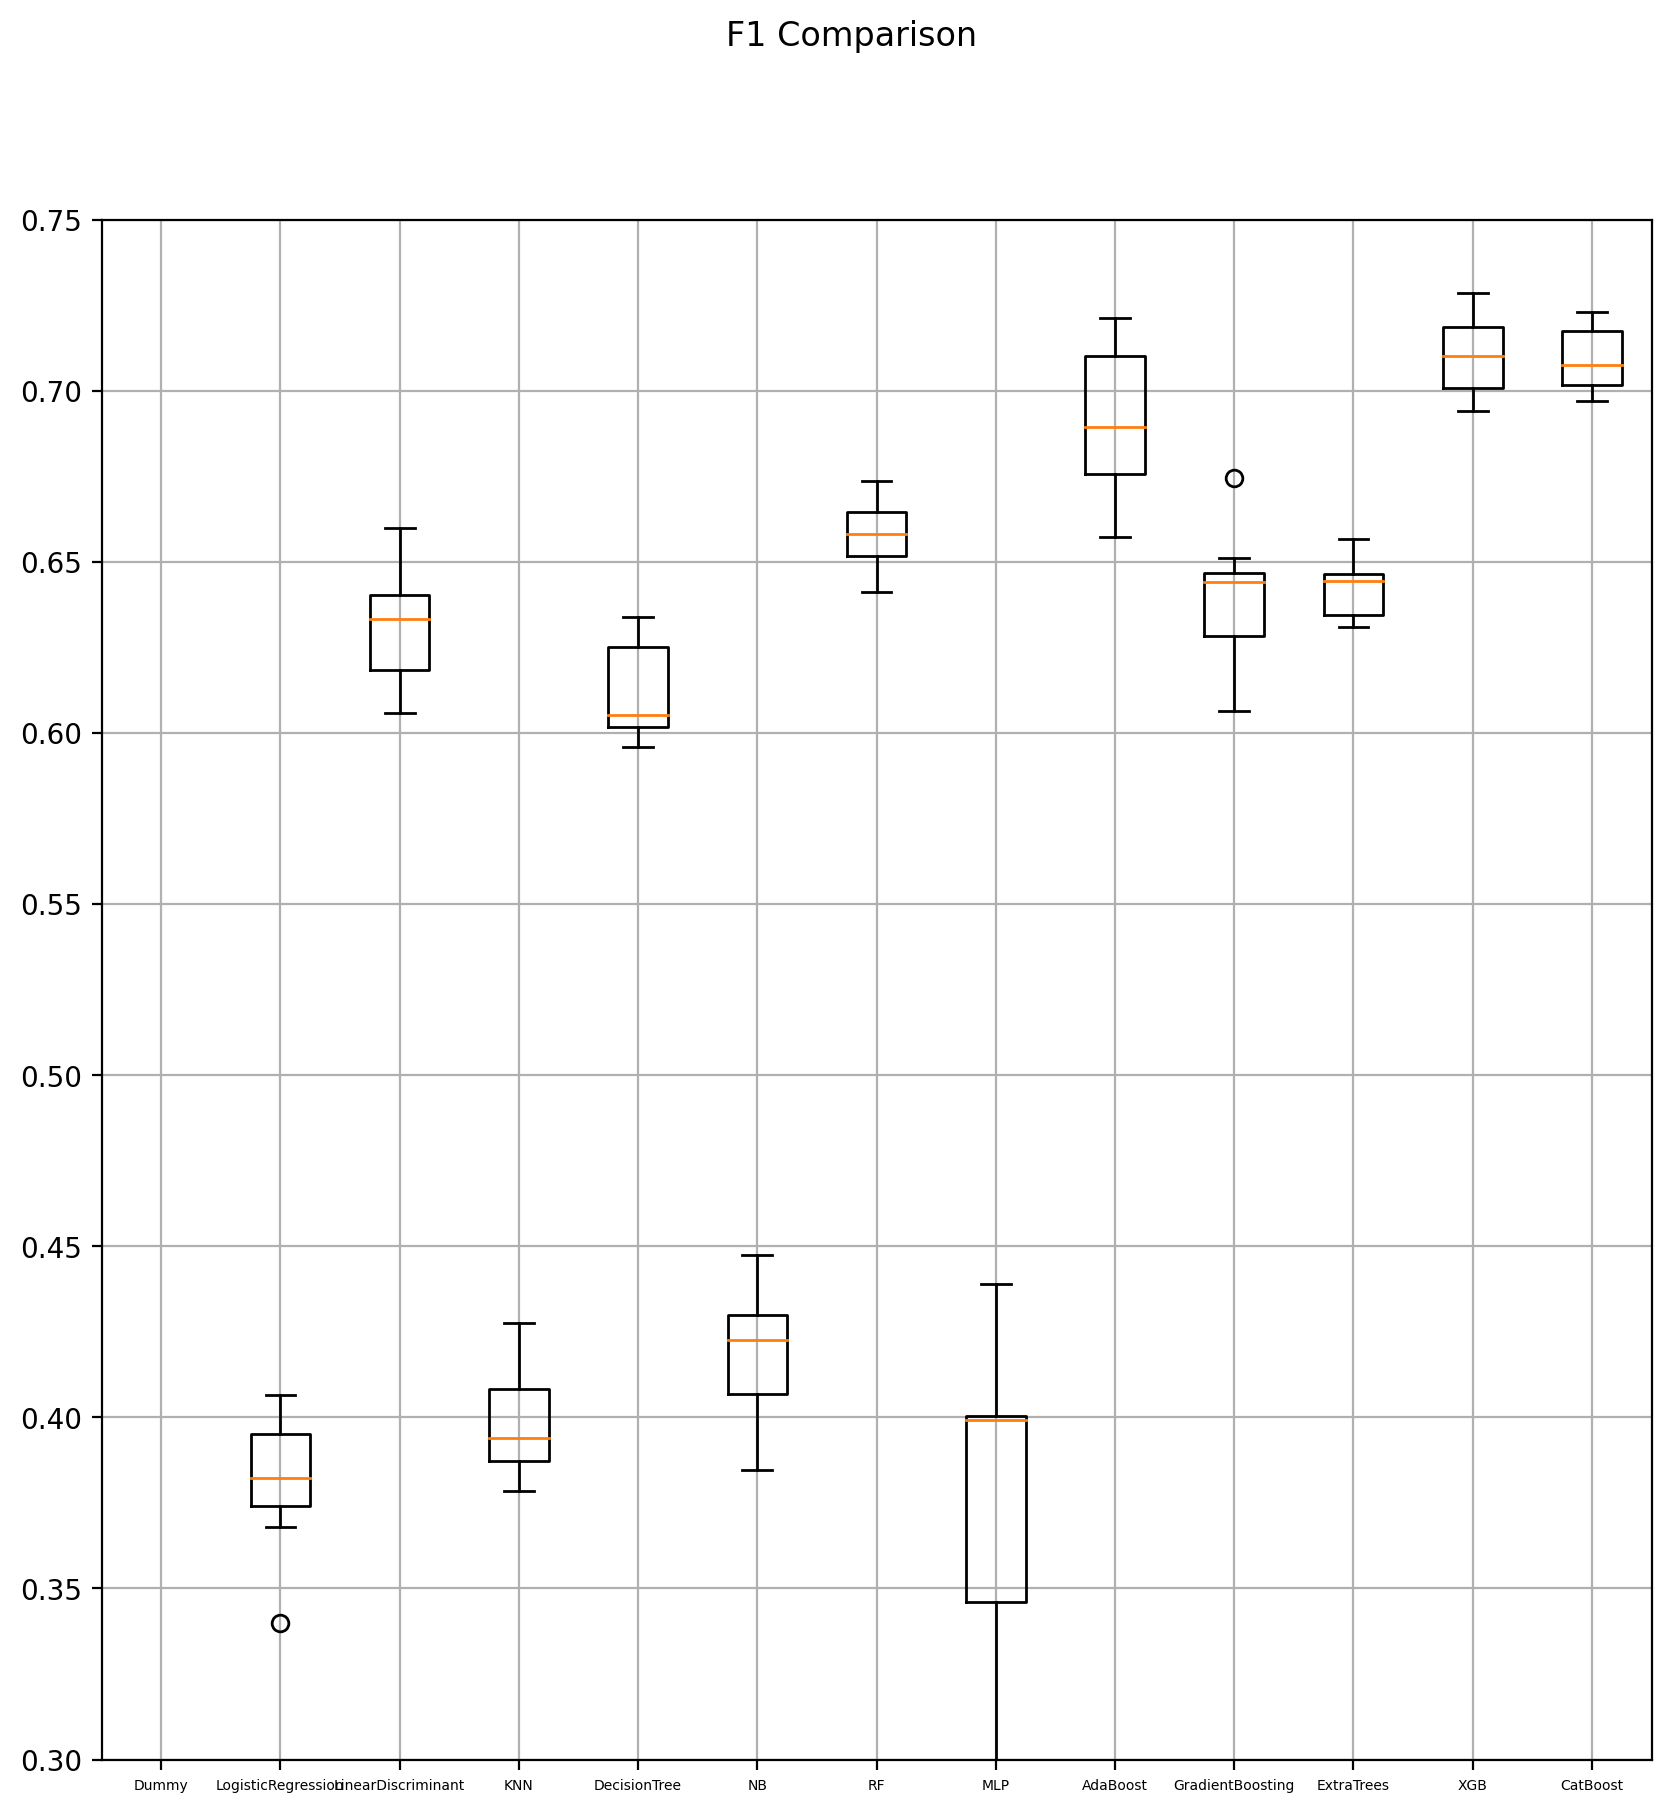

In [22]:
fig = plt.figure(figsize=(10, 10), dpi=200)
fig.suptitle('F1 Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_df.test_f1)
ax.set_xticklabels(names, fontsize=5)
plt.ylim((0.3, 0.75))
plt.grid()
plt.show();

AUC при разных $p_i$

$$\frac1{\sum_{i,j}\mathbb{I}[y_i < y_j]}\sum_{i,j}\mathbb{I}[y_i < y_j]\mathbb{I}[\widehat{p}_i < \widehat{p}_j].$$

In [ ]:
import sklearn
from  sklearn import metrics 
import numpy as np 

def roc_auc(probabilities, y_test):
    probabilities, y_test = np.array(probabilities), np.array(y_test)
    sort_idx = np.argsort(probabilities)
    y_test = y_test[sort_idx]

    _, count = np.unique(probabilities[sort_idx], return_counts=True)
    y_split = np.split(y_test, np.cumsum(count))
    y_unuqie_pos, y_unuqie_neg = np.empty(len(y_split)), np.empty(len(y_split))
    
    for i, arr in enumerate(y_split):
        y_unuqie_pos[i] = arr.sum()
        y_unuqie_neg[i] = (1 - arr).sum()
    y_neg, y_pos = np.sum(y_test == 0), np.sum(y_test == 1)
    y_cum_neg, y_cum_pos = (np.cumsum(np.flip(y_unuqie_neg)))/y_neg, (np.cumsum(np.flip(y_unuqie_pos)))/y_pos
    delt_pos, delt_neg,  = np.diff(y_cum_pos), np.diff(y_cum_neg)
    return ((delt_pos.T @ delt_neg)* 0.5 + (y_cum_pos[:-1].T @ delt_neg))

0.25158886767421634
[0.         0.         0.         ... 0.99463155 0.99473284 1.        ] [0.00000000e+00 1.58654609e-04 1.67063303e-01 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [           inf 9.99848656e-01 9.85930987e-01 ... 1.11031983e-04
 1.10582271e-04 1.04437317e-05]
0.9487346180057834


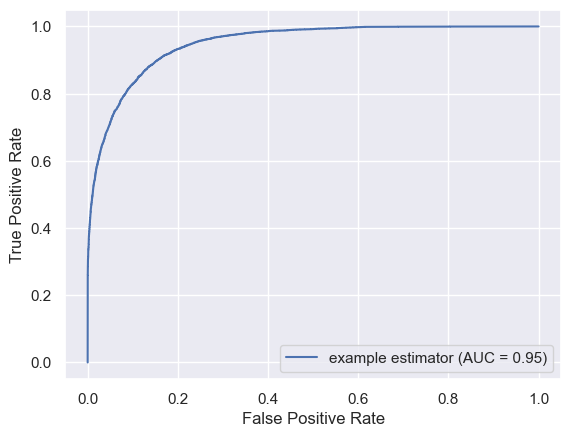

In [58]:
model = CatBoostClassiﬁer(iterations=100, silent=True).fit(X_train, Y_train)
y_prob = model.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train, y_prob[:, 1])
sens, spec = tpr, 1 - fpr
print(thresholds[np.argmax(sens + spec)])
roc_auc = metrics.auc(fpr, tpr)
print(fpr, tpr, thresholds)
print(roc_auc)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Прямая оптимизация AUC ROC:

$$\frac1{\sum_{i,j}\mathbb{I}[y_i < y_j]}\sum_{i,j}\mathbb{I}[y_i < y_j]\mathbb{I}[\widehat{p}_i < \widehat{p}_j]$$

Для лог регрессии:

$$\frac1{\sum_{i,j}\mathbb{I}[y_i < y_j]}\sum_{i,j}\mathbb{I}[y_i < y_j]\sigma(\widehat{l}_j - \widehat{l}_i),$$

In [141]:
import numpy as np
from sklearn.base import RegressorMixin
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import sklearn
from scipy.special import expit

def sigmoid(x):
    return expit(x)

def sigmoid_derivative(x):
    sigm = expit(x)
    return sigm*(1 - sigm)

class AUCLogisticOptimizer(RegressorMixin):
    def __init__(self, lr=0.1, momentum=0.9, delta_converged=1e-3, max_steps=20, batch_size=64):
        self.lr = lr
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        # if batch_size != 64:
        #     raise Exception(batch_size)
        self.batch_size = batch_size
        self.momentum = momentum
        self.W = None

    def calculate_gradient(self, X1, Y1, X2, Y2):
        logit_1, logit_2 = (X1 @ self.W).reshape(-1, 1, 1), (X2 @ self.W).reshape(1, -1, 1)
        logit_diff_matrix = logit_1 - logit_2
        y_mask = (Y1.reshape(-1, 1) - Y2.reshape(1, -1)) < 0
        X1_rsp, X2_rsp = X1.reshape(self.batch_size, 1, -1), X2.reshape(1, self.batch_size, -1)
        buff_grad_tensor = sigmoid_derivative(logit_diff_matrix) * (X1_rsp - X2_rsp)
        gradW = (y_mask[..., None] * buff_grad_tensor).sum(axis = (0, 1)) / (y_mask.sum() + 1e-15)
        return gradW.reshape(-1, 1)

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        batch_split_mask = [x for x in range(self.batch_size, n_samples, self.batch_size)]
        self.W = np.zeros((n_features, 1))
        num_steps = - 1
        grad = np.zeros((n_features, 1))
        while (num_steps := num_steps + 1) < self.max_steps:
            X_step, y_step = sklearn.utils.shuffle(X, Y)
            X_batches, y_batches = np.split(X_step, batch_split_mask), np.split(y_step, batch_split_mask)
            for X_batch, y_batch in zip(X_batches, y_batches):
                curr_batch_len = len(y_batch)
                if curr_batch_len != self.batch_size:
                    continue
                grad = self.calculate_gradient(X_batch, y_batch, X_batch, y_batch) + self.momentum * grad
                self.W -= self.lr * grad
                if np.linalg.norm(grad) < self.delta_converged:
                    return self
                # print(np.linalg.norm(grad))
            print(num_steps, roc_auc_score(Y, self.predict_proba(X)[:,1]), accuracy_score(Y, self.predict(X)))
        # if acc:
        #     raise Exception(acc)
        # return self

    def predict(self, X):
        y_pred = (self.predict_proba(X)[:, 1] >= 0.5).astype(np.uint8)
        return y_pred
    
    def predict_proba(self, X):
        logits = sigmoid(X @ self.W).reshape(-1, 1)
        return np.hstack([1. - logits, logits])


In [142]:
lr_clf = LogisticRegression(fit_intercept=False, penalty=None)

In [147]:
from sklearn.preprocessing import StandardScaler
import sklearn

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_validation_sc = scaler.transform(X_validation)

clf = AUCLogisticOptimizer(lr=1e-1, batch_size=32, momentum=0.5, max_steps=60)
clf.fit(X_train_sc, Y_train)

0 0.8994797181435988 0.7210918304668305
1 0.9011933968345492 0.7245469901719902
2 0.9025652831173216 0.7243166461916462
3 0.9032488840040357 0.7253148034398035
4 0.9038823534091075 0.7260058353808354
5 0.9044830071432338 0.7260058353808354
6 0.9048864695500667 0.7247005528255528
7 0.9052752115090119 0.726735257985258
8 0.9055762012783407 0.7273111179361179
9 0.9058331180909764 0.7284244471744472
10 0.9060197110171987 0.7271191646191646
11 0.9061639906909237 0.7283092751842751
12 0.9063596312286748 0.7278101965601965
13 0.9064996040464679 0.7284628378378378
14 0.9066348079855377 0.729460995085995
15 0.906544974684566 0.7291538697788698
16 0.9066749195989947 0.7293074324324325
17 0.9067914738876569 0.7300752457002457
18 0.9069462595578955 0.730612714987715
19 0.9069829562202872 0.7298832923832924
20 0.9071415947588456 0.7304207616707616
21 0.9072002475477938 0.7299600737100738
22 0.9072126860048515 0.7298832923832924
23 0.907304548188515 0.7311501842751843
24 0.9073473033758559 0.7316876

In [134]:
lr_clf.fit(X_train_sc, Y_train)

LogisticRegression(fit_intercept=False, penalty=None)

In [135]:
print(
    accuracy_score(Y_validation, clf.predict(X_validation_sc)),
    accuracy_score(Y_validation, lr_clf.predict(X_validation_sc))
    )

0.711346537693843 0.8288039306003377


In [136]:
roc_auc_score(Y_validation, clf.predict_proba(X_validation_sc)[:,1])

0.8930025942456102

In [137]:
clf.predict_proba(X_train_sc)

array([[5.11227310e-01, 4.88772690e-01],
       [9.68998229e-01, 3.10017709e-02],
       [9.99953745e-01, 4.62551299e-05],
       ...,
       [4.00609977e-02, 9.59939002e-01],
       [9.99594740e-01, 4.05260102e-04],
       [5.16186859e-01, 4.83813141e-01]])

In [138]:
roc_auc_score(Y_train, clf.predict_proba(X_train_sc)[:,1])

0.898740369185137

In [148]:
bin_clf_base = './'
df = pd.read_csv(bin_clf_base + "adult.csv")
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [149]:
# Числовые признаки
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Категориальные признаки
cat_features = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']

In [150]:
y_col = 'education.num'
y = df[y_col]
X = df.loc[:, df.columns!=y_col]
print(X.columns)
X = X.loc[:, X.columns!='education']

if 'education' in cat_features:
    cat_features.remove('education')

for cat_feature in cat_features:
    one_hot = pd.get_dummies(X[cat_feature], drop_first=True, prefix=cat_feature)
    X = X.drop(cat_feature, axis=1)
    X = X.join(one_hot)

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')


In [151]:
validation_size = 0.20
seed = 17

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,
    test_size=validation_size, random_state=seed, stratify=y)

In [152]:
sorted(Y_train.unique()), sorted(Y_validation.unique())

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [153]:
from sklearn.metrics import confusion_matrix

clf = CatBoostClassifier(silent=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_validation)


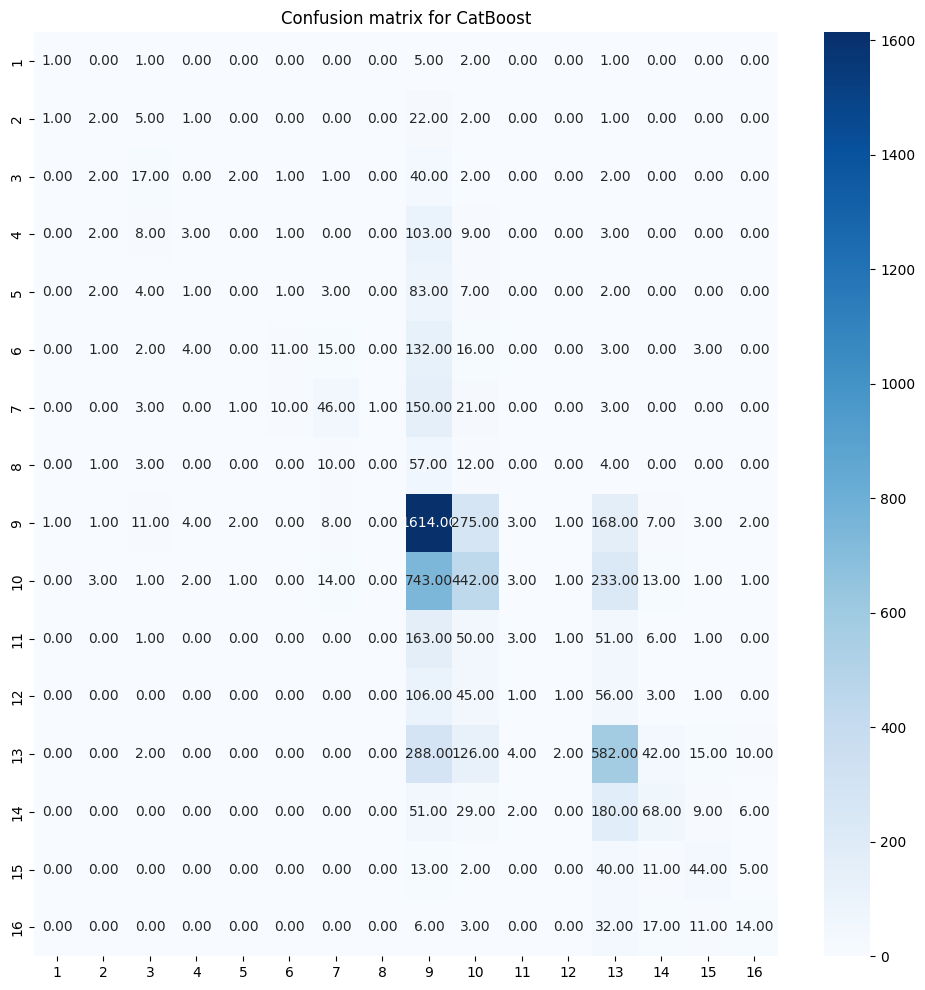

In [154]:
plt.figure(figsize=(12,12))

cm = confusion_matrix(Y_validation, y_pred)

g = sns.heatmap(cm,
                annot=True, fmt = ".2f", cmap=plt.cm.Blues,
               xticklabels=sorted(Y_validation.unique()),
                yticklabels=sorted(Y_validation.unique())).set_title(
    "Confusion matrix for CatBoost")

c:\Users\Tikhon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tikhon\AppData\Local\Temp\ipykernel_8444\315389864.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="education.num", data=df, palette = "muted")
c:\Users\Tikhon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


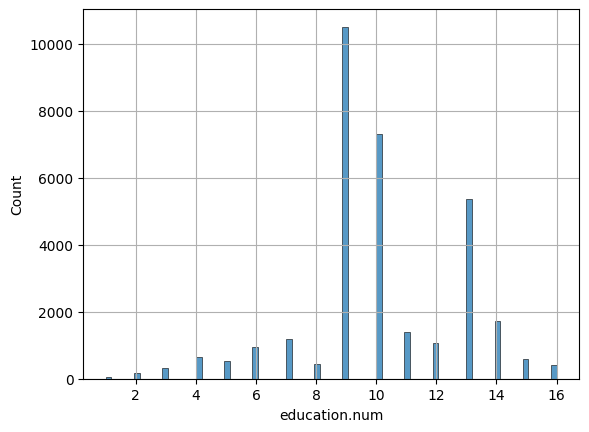

In [156]:
sns.histplot(x="education.num", data=df, palette = "muted")
plt.grid()

In [157]:
for i, category in enumerate(sorted(Y_validation.unique())):
    print(category, cm[i,i]/cm[i,:].sum())

1 0.1
2 0.058823529411764705
3 0.2537313432835821
4 0.023255813953488372
5 0.0
6 0.058823529411764705
7 0.19574468085106383
8 0.0
9 0.7685714285714286
10 0.30315500685871055
11 0.010869565217391304
12 0.004694835680751174
13 0.5434173669467787
14 0.19710144927536233
15 0.3826086956521739
16 0.1686746987951807


In [158]:
balanced_accuracy_score(Y_validation, clf.predict(X_validation))

0.19184199649434006

In [159]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - np.diag(cm)
FN = np.sum(cm, axis=1) - np.diag(cm)
TN = np.sum(cm) - TP - FP - FN

submetrics = pd.DataFrame({'TP': TP, 'FP': FP, 'FN': FN, 'TN':TN},
                         index=sorted(Y_validation.unique()))
submetrics

,TP,FP,FN,TN
1,1,2,9,6501
2,2,12,32,6467
3,17,41,50,6405
4,3,12,126,6372
5,0,6,103,6404
6,11,13,176,6313
7,46,51,189,6227
8,0,1,87,6425
9,1614,1962,486,2451
10,442,601,1016,4454


In [160]:
micro_average = submetrics.mean(axis=0)
micro_precision = micro_average['TP'] / (micro_average['TP'] + micro_average['FP'])
micro_recall = micro_average['TP'] / (micro_average['TP'] + micro_average['FN'])
micro_f1 = (2*micro_precision*micro_recall) / (micro_precision + micro_recall)
print('f1_micro =', micro_f1)

f1_micro = 0.4372792875786888


In [161]:
np.allclose(micro_f1, f1_score(Y_validation, y_pred, average='micro'))

True

In [162]:
macro_precision = submetrics['TP'] / (submetrics['TP'] + submetrics['FP'] + 1e-20)
macro_recall = submetrics['TP'] / (submetrics['TP'] + submetrics['FN'] + 1e-20)
macro_f1 = np.mean((2*macro_precision*macro_recall) / (macro_precision + macro_recall + 1e-20))
print('f1_macro =', macro_f1)

f1_macro = 0.20582595302244014


In [163]:
np.allclose(macro_f1, f1_score(Y_validation, y_pred, average='macro'), rtol=1e-5)

True

In [165]:
print(submetrics['TP'].sum(), submetrics['TP'].sum() + submetrics['FN'].sum())

2848 6513


In [166]:
submetrics['TP'] + submetrics['FN']

1       10
2       34
3       67
4      129
5      103
6      187
7      235
8       87
9     2100
10    1458
11     276
12     213
13    1071
14     345
15     115
16      83
dtype: int64